# E.D.A y Analisis Dataset train

En este notebook hacemos el E.D.A al dataset original train.csv, esto con el objetivo de Comprender los datos, Evaluar la calidad de los datos, Limpiar los datos, Reducir su complejidad y Sacar conclusiones sobre el contenido de este

#### Añadimos el directorio raíz al sys.path para facilitar importaciones

In [ ]:
import os

notebook_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(notebook_dir, '..'))
os.chdir(root_dir)

print("Directorio de trabajo actual después del cambio:", os.getcwd())

Directorio de trabajo actual después del cambio: c:\Users\camilo\proyecto_1


#### Importamos las Librerias

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Importamos la conexion 

In [53]:
from Database.conexion_BD import create_connection

connection = create_connection()
if connection is not None:
    print("Conexión establecida con éxito.")
else:
    print("No se pudo establecer la conexión.")

Conexión exitosa a la base de datos PostgreSQL.
Conexión establecida con éxito.


#### Cargamos la tabla flights ubicada en la Base de Datos PostgreSQL, y la almacenamos en un Dataframe 

In [54]:
table_name = 'flights' 

query = f"SELECT * FROM {table_name};"
flights = pd.read_sql(query, con=connection)
flights.head()

C:\Users\camilo\AppData\Local\Temp\ipykernel_11916\3754038683.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  flights = pd.read_sql(query, con=connection)


,month,day_of_week,dep_del15,dep_time_blk,distance_group,segment_number,concurrent_flights,number_of_seats,carrier_name,airport_flights_month,...,previous_airport,prcp,snow,snwd,tmax,awnd,carrier_historical,dep_airport_hist,day_historical,dep_block_hist
0,7,7,0,1500-1559,3,3,26,160,American Airlines Inc.,19534,...,Chicago O'Hare International,0.0,0.0,0.0,950.0,425.0,2.377090e+15,2.732360e+15,2.225380e+16,2.554790e+16
1,4,1,0,1300-1359,4,4,63,50,SkyWest Airlines Inc.,18788,...,El Paso International,0.0,0.0,0.0,710.0,1141.0,1.546510e+15,1.218490e+16,2.379720e+15,1.975030e+16
2,11,4,0,0001-0559,2,1,3,76,American Eagle Airlines Inc.,1148,...,NONE,0.0,0.0,0.0,540.0,45.0,1.175590e+16,1.878670e+16,1.398860e+15,6.032660e+15
3,3,2,0,1500-1559,7,5,14,143,Southwest Airlines Co.,7612,...,San Jose International,0.0,0.0,0.0,640.0,805.0,2.043890e+15,1.414460e+16,1.328680e+16,2.020370e+14
4,7,3,0,0800-0859,1,2,85,50,American Eagle Airlines Inc.,29376,...,Cincinnati/Northern Kentucky International,1.0,0.0,0.0,940.0,1051.0,2.032630e+16,1.937610e+16,2.030270e+15,1.130500e+16


#### Contexto Dataset 

Este Dataset fue extraido de la pagina web kaggle una plataforma de competencia de ciencia de datos y una comunidad en línea para científicos de datos y profesionales del aprendizaje automático de Google LLC.

Este Dataset contiene informacion sobre vuelos retrasados en el año 2019 con informacion sobre el clima, aereopuerto entre otros, para un mayor detalle puede visitar la pagina de donde salio en el siguiente enlace: https://www.kaggle.com/datasets/threnjen2019-airline-delays-and-cancellations?select=train.csv

##### Exploramos el Dataset para ver su contenido

Numero de filas y columnas 

In [55]:
num_rows, num_columns = flights.shape
print(f"Tamaño del Dataset: {num_rows} filas y {num_columns} columnas")

Tamaño del Dataset: 1048575 filas y 30 columnas


Revisamos el tipo de datos y la cantidad de valores unicos en el dataset 

In [56]:
summary = pd.DataFrame({
    'Tipo de Dato': flights.dtypes,
    'Valores Únicos': [flights[col].nunique() for col in flights.columns],
})

summary

,Tipo de Dato,Valores Únicos
month,int64,12
day_of_week,int64,7
dep_del15,int64,2
dep_time_blk,object,19
distance_group,int64,11
segment_number,int64,15
concurrent_flights,int64,107
number_of_seats,int64,82
carrier_name,object,17
airport_flights_month,int64,969


##### Descripcion de columnas 

1. Información Temporal:
- **MONTH:** Mes del año.
- **DAY_OF_WEEK:** Día de la semana.
- **DEP_BLOCK_HIST:** Bloque de salida.
2. Variables de Destino (Target):
- **DEP_DEL15:** Indicador binario de un retraso de salida de más de 15 minutos (1 es sí).
3. Características del Vuelo:
- **DISTANCE_GROUP:** Grupo de distancia que volará la aeronave.
- **SEGMENT_NUMBER:** Número de segmento en el que se encuentra la aeronave para el día.
- **CONCURRENT_FLIGHTS:** Número de vuelos simultáneos que salen del aeropuerto en el mismo bloque de salida.
- **NUMBER_OF_SEATS:** Número de asientos en la aeronave.
- **PLANE_AGE:** Antigüedad de la aeronave que sale.
4. Características del Transportista y Aeropuerto:
- **CARRIER_NAME:** Nombre del transportista.
- **AIRPORT_FLIGHTS_MONTH:** Promedio de vuelos del aeropuerto por mes.
- **AIRLINE_FLIGHTS_MONTH:** Promedio de vuelos de la aerolínea por mes.
- **AIRLINE_AIRPORT_FLIGHTS_MONTH:** Promedio de vuelos por mes para la aerolínea y el aeropuerto.
- **AVG_MONTHLY_PASS_AIRPORT:** Promedio de pasajeros para el aeropuerto de salida para el mes.
- **AVG_MONTHLY_PASS_AIRLINE:** Promedio de pasajeros por aerolínea para el mes.
- **FLT_ATTENDANTS_PER_PASS:** Auxiliares de vuelo por pasajero de la aerolínea.
- **GROUND_SERV_PER_PASS:** Empleados de servicio en tierra (mostrador de servicio) por pasajero de la aerolínea.
5. Información Geográfica:
- **DEPARTING_AIRPORT:** Aeropuerto de salida.
- **LATITUDE:** Latitud del aeropuerto de salida.
- **LONGITUDE:** Longitud del aeropuerto de salida.
- **PREVIOUS_AIRPORT:** Aeropuerto anterior del que salió la aeronave.
6. Condiciones Meteorológicas:
- **PRCP:** Pulgadas de precipitación del día.
- **SNOW:** Pulgadas de nevadas del día.
- **SNWD:** Pulgadas de nieve en tierra del día.
- **TMAX:** Temperatura máxima del día.
- **AWND:** Velocidad máxima del viento del día

#### Limpieza de Datos 

##### Verificamos la calidad de los datos

Miramos si hay valores nulos 

In [ ]:
print("Valores Nulos:")
valores_nulos = pd.DataFrame(flights.isnull().sum())

valores_nulos

Valores Nulos:


,0
month,0
day_of_week,0
dep_del15,0
dep_time_blk,0
distance_group,0
segment_number,0
concurrent_flights,0
number_of_seats,0
carrier_name,0
airport_flights_month,0


Miramos si hay valores duplicados 

In [58]:
print("\nValores Duplicados:")
print(f"Número de filas duplicadas: {flights.duplicated().sum()}")


Valores Duplicados:
Número de filas duplicadas: 845


No se encontraron valores nulos, sin embargo se encontraron 845 datos duplicados por lo que vamos a proceder a eliminarlas para asegurar que asegurar que el  análisis no esté influenciado por registros redundantes

In [59]:
flights = flights.drop_duplicates()

Comprobamos

In [60]:
print("\nValores Duplicados:")
print(f"Número de filas duplicadas: {flights.duplicated().sum()}")


Valores Duplicados:
Número de filas duplicadas: 0


##### Buscamos datos atípicos 

Para las columnas del dia de la semana, mes y la que indica si un vuelo fue retrasado o no, traemos el valor minimo y maximo de para verificar que no hayan datos incoherentes 

In [61]:
max_month = flights['month'].max()
min_month = flights['month'].min()

max_day_of_week = flights['day_of_week'].max()
min_day_of_week = flights['day_of_week'].min()

max_dep_del15 = flights['dep_del15'].max()
min_dep_del15 = flights['dep_del15'].min()

print(f"Valor máximo de 'MONTH': {max_month}")
print(f"Valor mínimo de 'MONTH': {min_month}")
print(f"Valor máximo de 'DAY_OF_WEEK': {max_day_of_week}")
print(f"Valor mínimo de 'DAY_OF_WEEK': {min_day_of_week}")
print(f"Valor máximo de 'DEP_del15': {max_dep_del15}")
print(f"Valor mínimo de 'DEP_del15': {min_dep_del15}")

Valor máximo de 'MONTH': 12
Valor mínimo de 'MONTH': 1
Valor máximo de 'DAY_OF_WEEK': 7
Valor mínimo de 'DAY_OF_WEEK': 1
Valor máximo de 'DEP_del15': 1
Valor mínimo de 'DEP_del15': 0


Los datos son coherentes debido a que son 12 meses representados con números, y los 7 días de la semana también representados con números 

Verificamos si  hay datos negativos para estas columnas: distance_group segment_number, concurrent_flights, number_of_seats, flt_attendants_per_pass,   ground_serv_per_pass y en caso de que si, eliminarlos debido a que su presencia en estas seria ilógica  

In [62]:
columns_to_check = ['distance_group', 'segment_number', 'concurrent_flights', 'number_of_seats', 'flt_attendants_per_pass', 'ground_serv_per_pass', 'plane_age']

negative_values = flights[flights[columns_to_check].lt(0).any(axis=1)]

print("Valores negativos encontrados en las columnas especificadas:")
print(negative_values)

Valores negativos encontrados en las columnas especificadas:
Empty DataFrame
Columns: [month, day_of_week, dep_del15, dep_time_blk, distance_group, segment_number, concurrent_flights, number_of_seats, carrier_name, airport_flights_month, airline_flights_month, airline_airport_flights_month, avg_monthly_pass_airport, avg_monthly_pass_airline, flt_attendants_per_pass, ground_serv_per_pass, plane_age, departing_airport, latitude, longitude, previous_airport, prcp, snow, snwd, tmax, awnd, carrier_historical, dep_airport_hist, day_historical, dep_block_hist]
Index: []

[0 rows x 30 columns]


No encontramos valores negativos en estas columnas 

Hacemos lo mismo para las columnas: airport_flights_month, airline_flights_month, airline_airport_flights_month, avg_monthly_pass_airport, avg_monthly_pass_airline

In [63]:
columns_to_check = ['airport_flights_month', 'airline_flights_month', 'airline_airport_flights_month', 'avg_monthly_pass_airport', 'avg_monthly_pass_airline']

negative_values = flights[flights[columns_to_check].lt(0).any(axis=1)]

print("Valores negativos encontrados en las columnas especificadas:")
print(negative_values)

Valores negativos encontrados en las columnas especificadas:
Empty DataFrame
Columns: [month, day_of_week, dep_del15, dep_time_blk, distance_group, segment_number, concurrent_flights, number_of_seats, carrier_name, airport_flights_month, airline_flights_month, airline_airport_flights_month, avg_monthly_pass_airport, avg_monthly_pass_airline, flt_attendants_per_pass, ground_serv_per_pass, plane_age, departing_airport, latitude, longitude, previous_airport, prcp, snow, snwd, tmax, awnd, carrier_historical, dep_airport_hist, day_historical, dep_block_hist]
Index: []

[0 rows x 30 columns]


No encontramos valores negativos en estas columnas 

Mostramos los valores únicos y la cantidad de veces que salen de la columna carrier_name 

In [64]:
carrier_name_counts = flights['carrier_name'].value_counts().reset_index()
carrier_name_counts.columns = ['value', 'count']
print(carrier_name_counts)

                           value   count
0         Southwest Airlines Co.  208986
1           Delta Air Lines Inc.  152319
2         American Airlines Inc.  145919
3          United Air Lines Inc.   96959
4          SkyWest Airlines Inc.   94620
5          Midwest Airline. Inc.   48448
6                JetBlue Airways   43243
7           Alaska Airlines Inc.   38938
8   American Eagle Airlines Inc.   37053
9                    Comair Inc.   35322
10             Endeavor Air Inc.   32637
11              Spirit Air Lines   30101
12            Mesa Airlines Inc.   28690
13        Frontier Airlines Inc.   19715
14   Atlantic Southeast Airlines   15874
15        Hawaiian Airlines Inc.   12145
16                 Allegiant Air    6761


Tenemos que hay 16 aerolíneas diferentes y nos muestra el número de vuelos asociados a cada aerolínea en el conjunto de datos.

Miramos la cantidad de valores unicos de las columnas departing_airport, y previus_airport.

In [65]:
unique_values_departing_airport = flights['departing_airport'].nunique()

unique_values_previous_airport = flights['previous_airport'].nunique()

print(unique_values_departing_airport)
print(unique_values_previous_airport)

96
354


Este resultado nos dice que hay vuelos que salen de 95 aereopuertos diferentes (Debido a que un dato en esa columna no es un aereopuerto si no es NONE), y que hay 354 aereopuertos diferentes que figuran como el aereopuerto anterior en los datos 

La diferencia en la cantidad de valores únicos entre estas dos columnas refleja la diversidad de rutas y conexiones en los datos, con más variedad en los aeropuertos de origen previos en comparación con los aeropuertos de salida.

Revisamos la columna flt_attendants_per_pass

In [66]:
print(flights['flt_attendants_per_pass'].head(10))

0    9.820829e+09
1    3.419267e+10
2    3.484080e+16
3    6.178236e+10
4    3.484080e+16
5    1.600390e+15
6    9.820829e+09
7    2.538040e+16
8    2.538040e+16
9    9.820829e+09
Name: flt_attendants_per_pass, dtype: float64


Debido a que son datos demasiado grandes para representar auxiliares de vuelo por pasajero, la eliminamos del dataset 

In [67]:
flights = flights.drop(columns=['flt_attendants_per_pass'])

Revisamos la columna ground_serv_per_pass

In [68]:
print(flights['ground_serv_per_pass'].head(10))

0    1.772870e+16
1    9.900279e+10
2    1.068670e+16
3    9.889412e+10
4    1.068670e+16
5    1.268660e+16
6    1.772870e+16
7    2.289850e+16
8    2.289850e+16
9    1.772870e+16
Name: ground_serv_per_pass, dtype: float64


Debido a que son datos demasiado grandes para representar la cantidad de personal en tierra por pasajero, tambien la eliminamos del dataset 

In [69]:
flights = flights.drop(columns=['ground_serv_per_pass'])

Revisamos las columnas carrier_historical, dep_airport_hist, day_historical, dep_block_hist

In [70]:
columns_of_interest = ['carrier_historical', 'dep_airport_hist', 'day_historical', 'dep_block_hist']

print(flights[columns_of_interest].head())

   carrier_historical  dep_airport_hist  day_historical  dep_block_hist
0        2.377090e+15      2.732360e+15    2.225380e+16    2.554790e+16
1        1.546510e+15      1.218490e+16    2.379720e+15    1.975030e+16
2        1.175590e+16      1.878670e+16    1.398860e+15    6.032660e+15
3        2.043890e+15      1.414460e+16    1.328680e+16    2.020370e+14
4        2.032630e+16      1.937610e+16    2.030270e+15    1.130500e+16


Estos datos representan números extremadamente grandes y no parece representar datos como identificadores de aerolíneas, aeropuertos, días o bloques de salida. por lo tanto tambien eliminaremos esas columnas.

In [71]:
columns_to_remove = ['carrier_historical', 'dep_airport_hist', 'day_historical', 'dep_block_hist']

flights = flights.drop(columns=columns_to_remove)

Verificamos las columnas del dataset para corroborar la eliminacion de estas 

In [72]:
print(flights.columns)

Index(['month', 'day_of_week', 'dep_del15', 'dep_time_blk', 'distance_group',
       'segment_number', 'concurrent_flights', 'number_of_seats',
       'carrier_name', 'airport_flights_month', 'airline_flights_month',
       'airline_airport_flights_month', 'avg_monthly_pass_airport',
       'avg_monthly_pass_airline', 'plane_age', 'departing_airport',
       'latitude', 'longitude', 'previous_airport', 'prcp', 'snow', 'snwd',
       'tmax', 'awnd'],
      dtype='object')


Revisamos las variables de latitude y longitude 

In [73]:
columns_of_interest = ['longitude', 'latitude']

print(flights[columns_of_interest].head())

   longitude  latitude
0   -80936.0   35219.0
1   -10488.0   39774.0
2   -92234.0   34729.0
3  -117187.0   32733.0
4   -87906.0   41978.0


Los valores en las columnas latitude y longitude parecen estar escalados por un factor de 1000. En su formato actual, es probable que representen coordenadas geográficas, pero multiplicadas por 1000. Para convertirlas a su formato original o apropiado, vamos a dividir cada valor por 1000.

In [75]:
flights['latitude'] = flights['latitude'] / 1000
flights['longitude'] = flights['longitude'] / 1000

Comprobamos el cambio

In [76]:
columns_of_interest = ['longitude', 'latitude']

print(flights[columns_of_interest].head())

   longitude  latitude
0    -80.936    35.219
1    -10.488    39.774
2    -92.234    34.729
3   -117.187    32.733
4    -87.906    41.978


Revisamos las columnas  prcp, snow, snwd, tmax, awnd

In [77]:
columns_of_interest = ['prcp', 'snow', 'snwd', 'tmax', 'awnd']

print(flights[columns_of_interest].head())

   prcp  snow  snwd   tmax    awnd
0   0.0   0.0   0.0  950.0   425.0
1   0.0   0.0   0.0  710.0  1141.0
2   0.0   0.0   0.0  540.0    45.0
3   0.0   0.0   0.0  640.0   805.0
4   1.0   0.0   0.0  940.0  1051.0


Los valores en las columnas PRCP (precipitación), SNOW (nieve), SNWD (profundidad de nieve), TMAX (temperatura máxima), y AWND (velocidad promedio del viento) parecen ser datos meteorológicos que pueden estar en un formato numérico específico.

Interpretación de los Valores:
prc (Precipitación en pulgadas): Los valores 0 y 1 indican la cantidad de precipitación. Si estos valores están en pulgadas, 1 podría representar 0.1 pulgadas, que es común en algunos registros meteorológicos.

snow (en décimas de pulgadas):  Un valor de 172 podría representar 17.2 pulgadas de nieve, lo cual es una cantidad considerable.

tmax (Temperatura máxima en décimas de grados Celsius): Los valores como 950 y 710 probablemente representan temperaturas en décimas de grados Celsius. Por ejemplo, 950 podría significar 95.0 °C, lo cual es extremadamente alto, lo que sugiere que estos valores tal vez necesiten un ajuste.

AWND (Velocidad promedio del viento en décimas de metros por segundo): Valores como 425 y 1141 podrían representar la velocidad del viento en décimas de metros por segundo. Por ejemplo, 425 significaría 42.5 m/s, que es una velocidad de viento extremadamente alta.

Vamos a dividir las columnas por 10 para la convercion de los valores a un formato mas comprencible y adecuado para hacer un analisis y una visualizacion de datos 

In [79]:
flights['prcp'] = flights['prcp'] / 10
flights['tmax'] = flights['tmax'] / 10
flights['awnd'] = flights['awnd'] / 10
flights['snow'] = flights['snow'] / 10

Revisamos las columnas para verificar la conversión 

In [80]:
columns_of_interest = ['prcp', 'snow', 'snwd', 'tmax', 'awnd']

print(flights[columns_of_interest].head())

   prcp  snow  snwd  tmax   awnd
0   0.0   0.0   0.0  95.0   42.5
1   0.0   0.0   0.0  71.0  114.1
2   0.0   0.0   0.0  54.0    4.5
3   0.0   0.0   0.0  64.0   80.5
4   0.1   0.0   0.0  94.0  105.1


#### Análisis de columnas 

##### Miramos la cantidad de vuelos por mes y dia de la semana 

Primero para tener una mayor facilidad al momento de interpretar este analisis vamos a convertir las columnas numericas de day_of_week y month en variables categoricas con los nombres de los meses y los dias 

In [81]:
meses = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

dias_semana = {
    1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday',
    6: 'Saturday', 7: 'Sunday'
}

flights['month'] = flights['month'].map(meses)
flights['day_of_week'] = flights['day_of_week'].map(dias_semana)

print(flights[['month', 'day_of_week']].head())

      month day_of_week
0      July      Sunday
1     April      Monday
2  November    Thursday
3     March     Tuesday
4      July   Wednesday


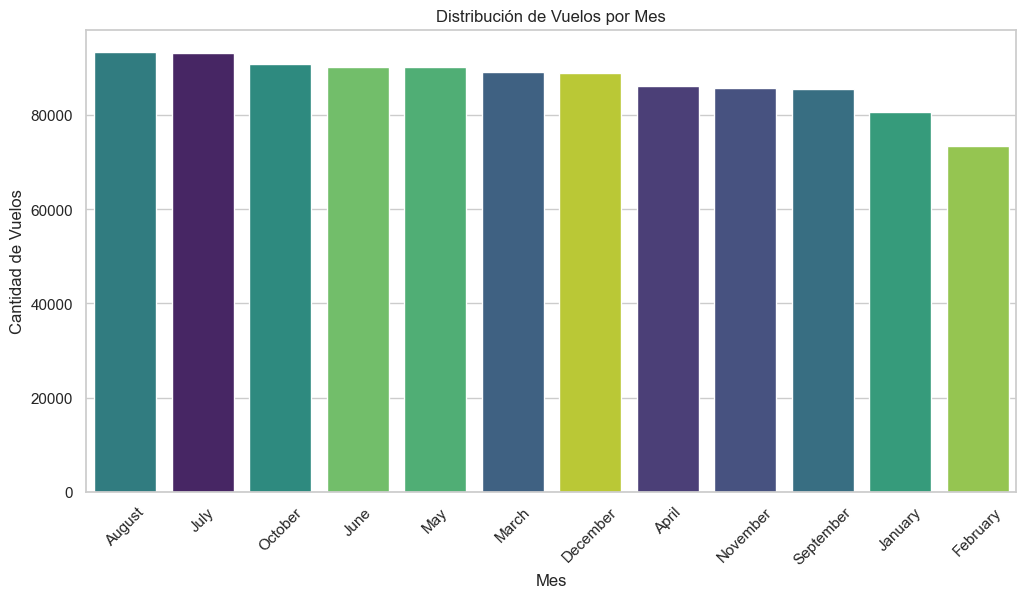

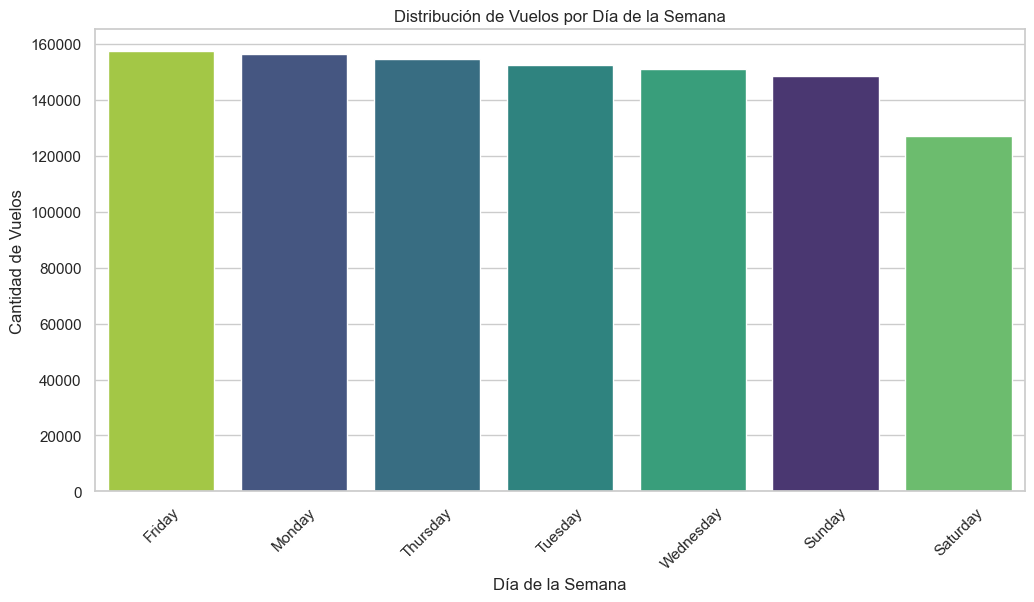

In [82]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=flights, order=flights['month'].value_counts().index, hue='month', palette='viridis', legend=False)
plt.title('Distribución de Vuelos por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Vuelos')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', data=flights, order=flights['day_of_week'].value_counts().index, hue='day_of_week', palette='viridis', legend=False)
plt.title('Distribución de Vuelos por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Vuelos')
plt.xticks(rotation=45)
plt.show()


Podemos ver que el mes de agosto y el dia viernes son los que presentan una mayor salida de vuelos   

##### Miramos si hay tendencias a lo largo del año en cuanto al número de vuelos o retrasos.

C:\Users\camilo\AppData\Local\Temp\ipykernel_11916\3187736644.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='month', y='dep_del15', data=flights, estimator=lambda x: sum(x)/len(x), marker='o', palette='viridis')


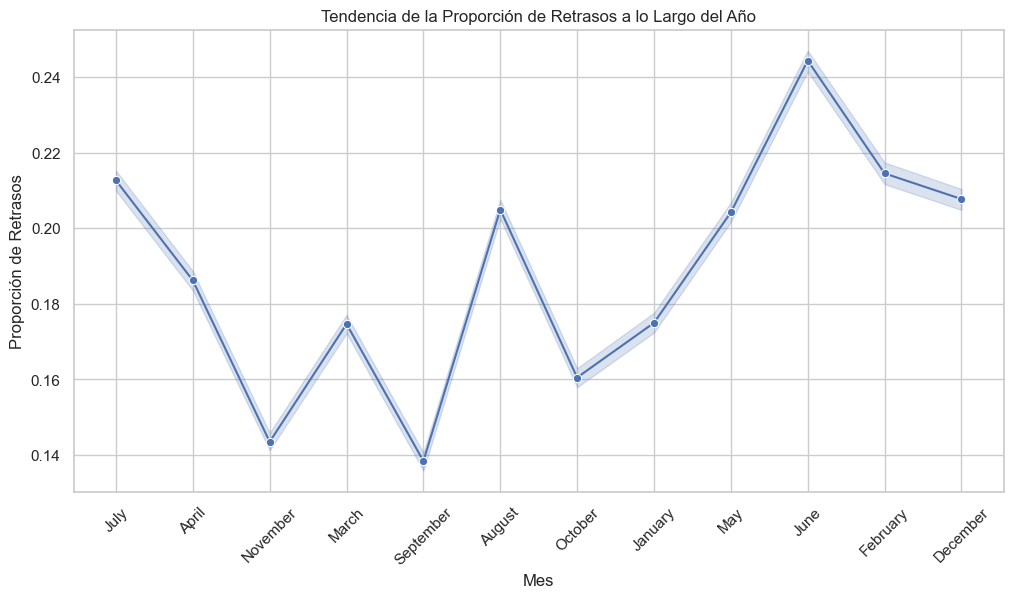

In [83]:
monthly_flight_counts = flights['month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='dep_del15', data=flights, estimator=lambda x: sum(x)/len(x), marker='o', palette='viridis')
plt.title('Tendencia de la Proporción de Retrasos a lo Largo del Año')
plt.xlabel('Mes')
plt.ylabel('Proporción de Retrasos')
plt.xticks(rotation=45)
plt.show()

La mayor proporción de retrasos en los vuelos se observa en el mes de junio, alcanzando un 24%.

##### Miramos la cantidad de vuelos por bloque de salida 

C:\Users\camilo\AppData\Local\Temp\ipykernel_11916\3978878033.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dep_time_blk', data=flights, order=flights['dep_time_blk'].value_counts().index, palette='viridis')


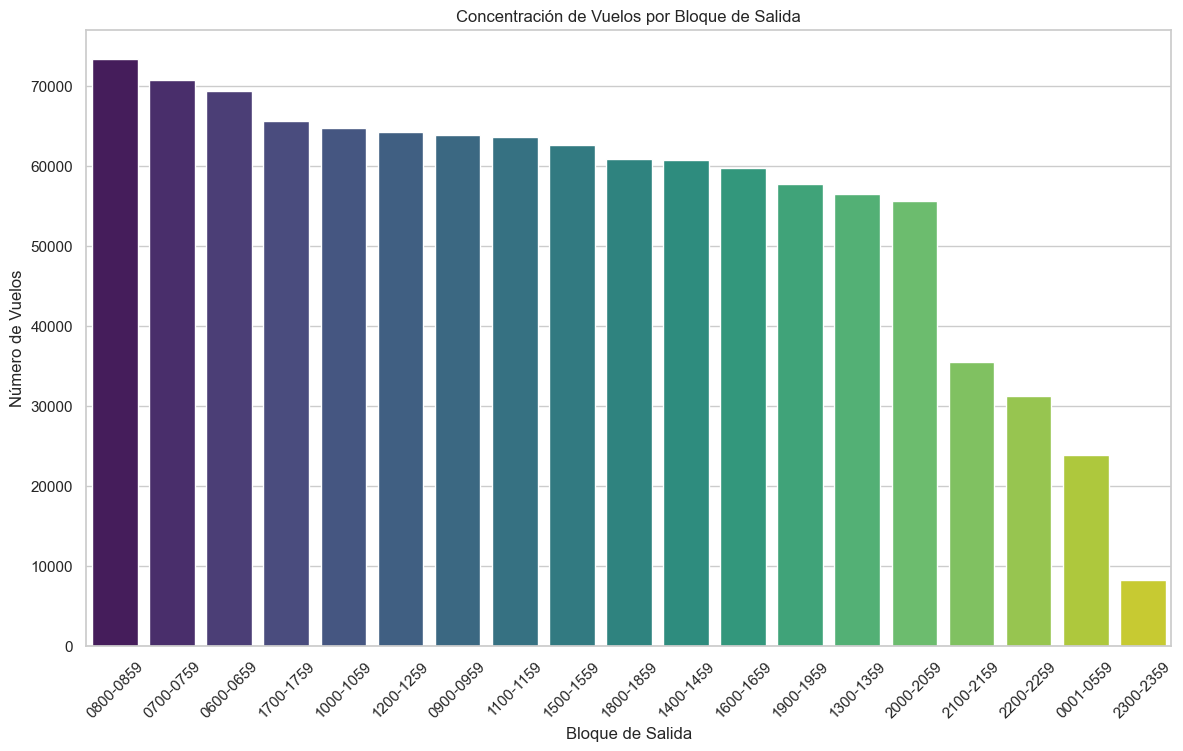

In [44]:
plt.figure(figsize=(14, 8))  
sns.countplot(x='dep_time_blk', data=flights, order=flights['dep_time_blk'].value_counts().index, palette='viridis')
plt.title('Concentración de Vuelos por Bloque de Salida')
plt.xlabel('Bloque de Salida')
plt.ylabel('Número de Vuelos')
plt.xticks(rotation=45)  
plt.show()

Vemos que el rango de horas en donde sale un mayor numero de vuelos es entre las 08:00 horas hasta las 08:59 horas 

C:\Users\camilo\AppData\Local\Temp\ipykernel_11916\2108031592.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_rate_by_block.index, y=delay_rate_by_block.values, palette='magma')


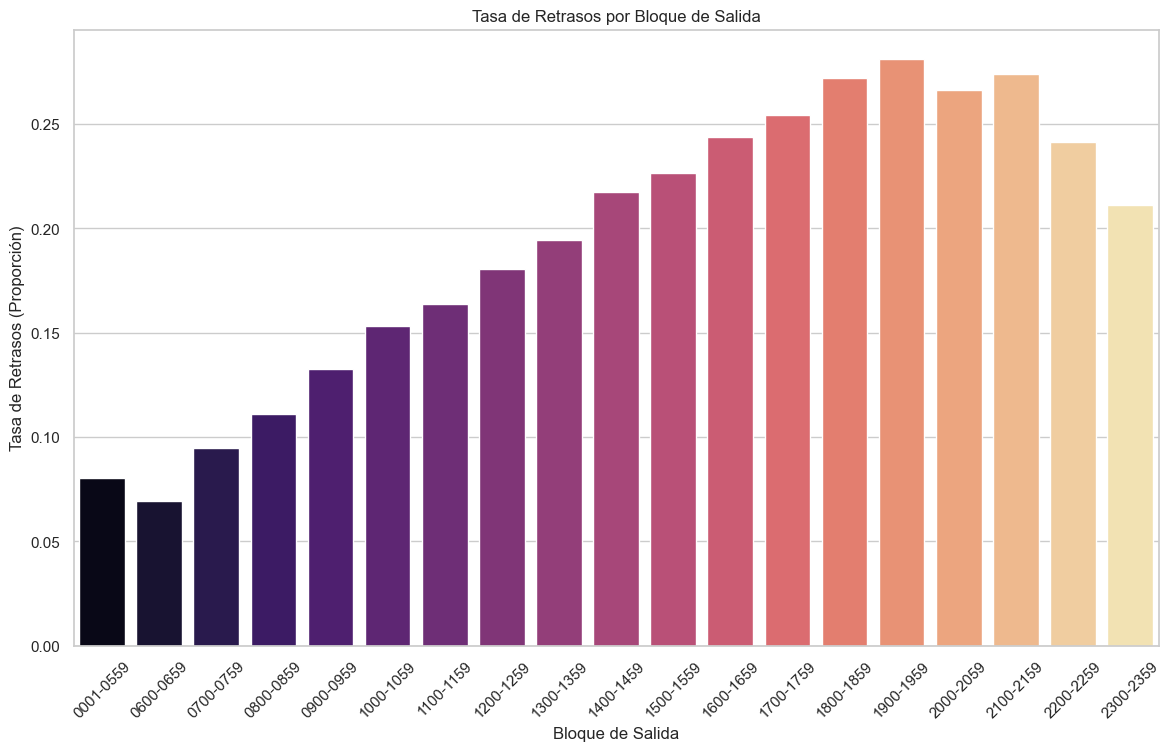

In [85]:
delay_rate_by_block = flights.groupby('dep_time_blk')['dep_del15'].mean()

plt.figure(figsize=(14, 8))  # Ampliar el tamaño del gráfico
sns.barplot(x=delay_rate_by_block.index, y=delay_rate_by_block.values, palette='magma')
plt.title('Tasa de Retrasos por Bloque de Salida')
plt.xlabel('Bloque de Salida')
plt.ylabel('Tasa de Retrasos (Proporción)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad
plt.show()

la mayor proporcion de retrasos que hay es en el rango de las 19:00 y 19:59 con una tasa de aproximadamente el 25%

##### Usamos histogramas para ver cómo se distribuyen las variables meteorologicas

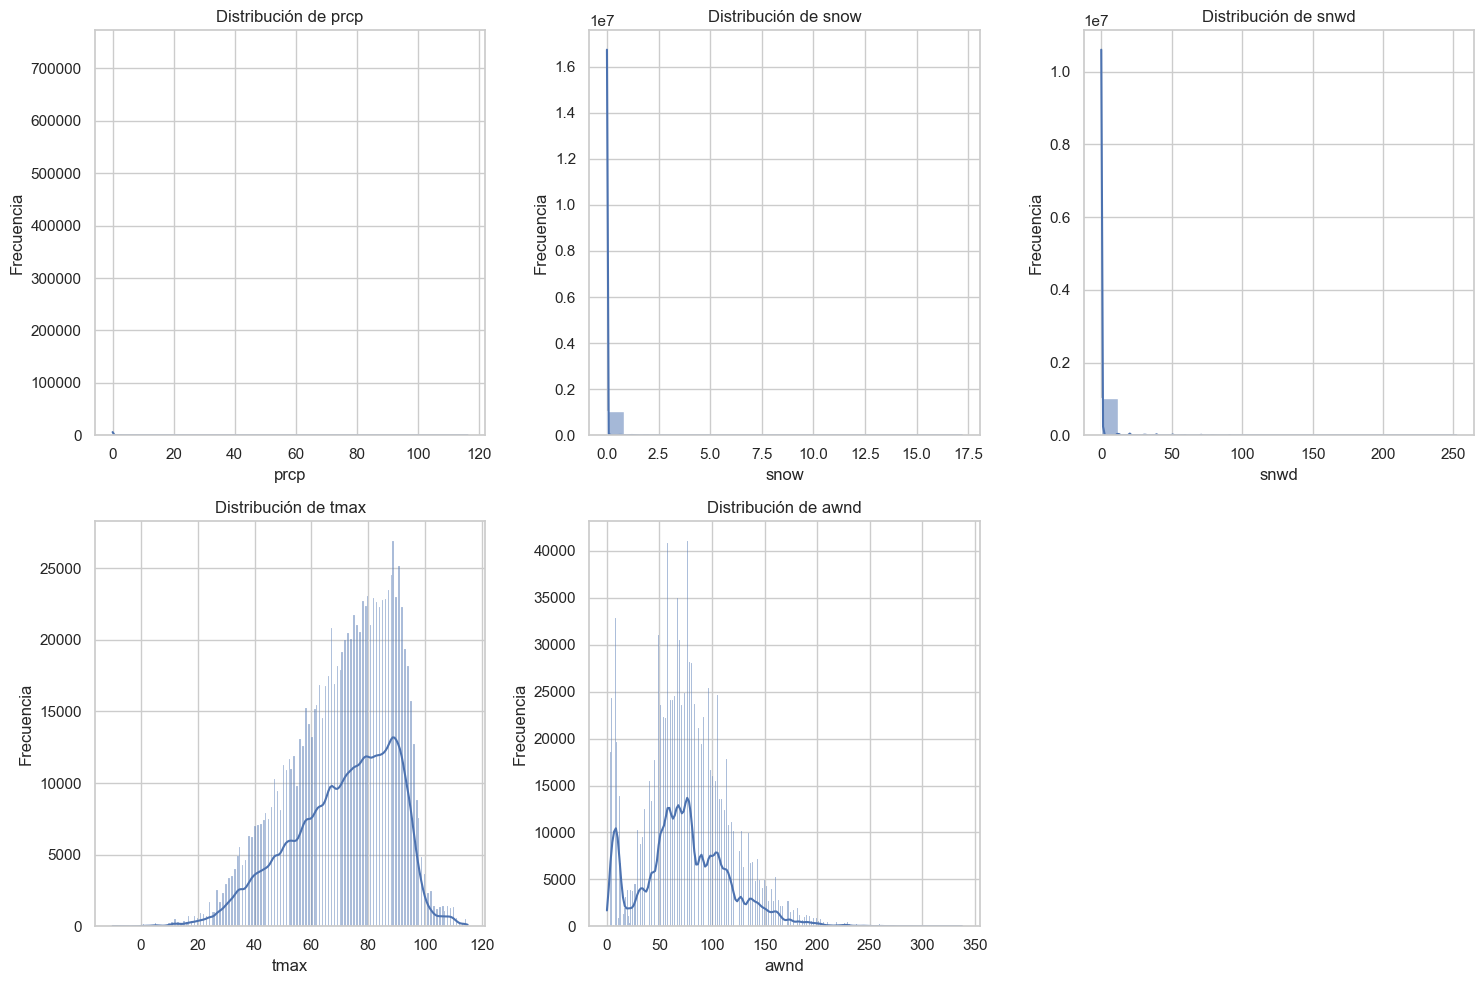

In [91]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(['prcp', 'snow', 'snwd', 'tmax', 'awnd'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(flights[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

- prcp (precipitación): La mayoría de los valores se concentran en niveles bajos, con algunos casos extremos de alta precipitación.
- snow (nieve): La mayor parte de los datos muestra poca o ninguna nevada, con pocos casos de acumulación significativa.
- snwd (profundidad de la nieve): Similar a la variable de nieve, la mayoría de las observaciones registran poca o ninguna acumulación de nieve.
- tmax (temperatura máxima): Esta variable presenta una distribución aproximadamente normal, con un pico alrededor de los 70-80 grados 
- awnd (velocidad del viento): La velocidad del viento muestra una distribución sesgada a la derecha, con la mayoría de los valores en rangos bajos a  moderados, pero con una cola larga hacia velocidades de viento más altas.

#### Resumen y Conclusiones:

#### Dataset Transformado 